# Equations différentielles débutant en python


## Sommaire:


- <b>Introduction.</b>

1. <b>Résoudre une équation différentielle d'ordre 1 sans second membre y' = f</b> 

    - <b>Exemple 1 : y' = 2x</b>
        - Solution Graphique/Numérique
        - Solution Symbolique

1. <b>Résoudre une équation différentielle d'ordre 1 sans second membre y' = ay</b> 
    

    - <b>Exemple 2 : y' = 2y</b>
        - Solution Graphique
        - Solution Symbolique

    -  <b>Exemple 3 :  5y’ + 2y = 0</b>
        - Solution Symbolique
            - Déterminer la solution générale de cette équation avec Sympy
            - Déterminer l’unique solution de l’équation telle que y(1) = 3 avec Sympy

    - <b>Exemple 4 : Le problème de Chauchy</b>
        - Solution Graphique
        - Solution Symbolique

    - <b>Exemple 5 : Des sin et des cos</b>
        - Solution Graphique
        - Solution Symbolique 

    - <b>Cas pratique 1 : Croissance de population</b>
        - Graphiquement.
        - Solution Symbolique

    - <b>Cas pratique 2 : Transfert thermique</b>
        - Solution Graphique
        - Solution Symbolique

    - <b>Cas pratique 3 : Finances</b>
        - Solution Graphique
        - Solution Symbolique
        
    - <b>Cas pratique 4 : Taux de salinité en reservoir percé</b>
        - Solution Graphique
        - Solution Symbolique

2. <b>Résoudre une équation différentielle d'ordre 1 avec second membre constant y' = ax + b </b>

    - <b>Exemple 2A : </b>
        - Solution Graphique
        - Solution Symbolique 

3. <b>Résoudre une équation différentielle d'ordre 2</b>

    - <b>Exemple 3A</b>
        - Solution Graphique
        - Solution Symbolique

    - <b>Exemple 3B</b>
        - Solution Graphique
        - Solution Symbolique 

4. <b>Annexes.  Résoudre numériquement une Eq Diff exprimée symboliquement</b>
    - La méthode avec lambdify
    - https://docs.sympy.org/latest/guides/solving/solve-ode.html

## Introduction

Une équation différentielle permet de décrire et analyser des systèmes dynamiques, et non statiques.
C'est à dire des systèmes en mouvement.
Une equation différentielle est une équation dont l'inconnue est une fonction.
On a une ou des solutions qui évoluent en fonction du temps quand on débute, pour comprendre.
Mais ensuite, ça peut être "en fonction" d'autre chose.


## ---------------------- Exemple 1 ------------------


\begin{cases}
y'=2x
\end{cases}

" On a une fonction dont la dérivée est égale à 2 fois la variable x"

" L’inconnue est la fonction 𝑦 dont la dérivée est égale à 2x " 

Lien : https://www.youtube.com/watch?v=qHF5kiDFkW8



## Solution Graphique 

In [811]:
# Import des libs
from scipy import *
from scipy.integrate import odeint #Pour résoudre l’équation différentielle
import matplotlib.pyplot as plt # Permet de tracer des graphes
import numpy as np
from math import *

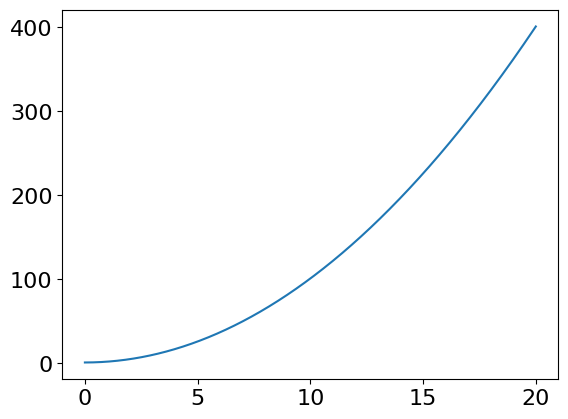

In [812]:
# Equation
def deriv (y,x) :
    return 2 * x

# Choix de l’ intervalle d’intégration
x0 = 0
xmax = 20
npoints = 1000
x = np.linspace ( x0 , xmax , npoints )

# Condition initiale
y0 = 1

solution = odeint ( deriv , y0 , x )
y = solution [ : , 0 ]

plt.plot ( x , y )
plt.show ( )

## Solution symbolique

## Etape 1 : Entrer l'eq diff dans Sympy

Ca permet à Sympy d'interpréter l'eq diff.

In [813]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
import sympy

x   = sympy.Symbol('x')
y   = sympy.Function('y')

left  = sympy.diff(y(x),x)

right = 2 * x

edo = sympy.Eq( left , right )
display(edo)

Eq(Derivative(y(x), x), 2*x)

## Etape 2 : Calculer la solution générale

On calcule les fonctions solution de l'eq diff.
On trouve bien la même solution que dans Yvan Monka.

In [814]:
solgen = sympy.dsolve(edo,y(x)) 
display(solgen)

Eq(y(x), C1 + x**2)

## ---------------------- Exemple 2 ------------------


\begin{cases}
y'=2y
\end{cases}

" La dérivée de la fonction y est égale à 2 fois la fonction y"

Lien : https://www.youtube.com/watch?v=qHF5kiDFkW8
Lien : https://www.maths-et-tiques.fr/telech/20Prim-EdTC.pdf

## Solution Graphique 

In [815]:
# Import des libs
from scipy import *
from scipy.integrate import odeint #Pour résoudre l’équation différentielle
import matplotlib.pyplot as plt # Permet de tracer des graphes
import numpy as np
from math import *

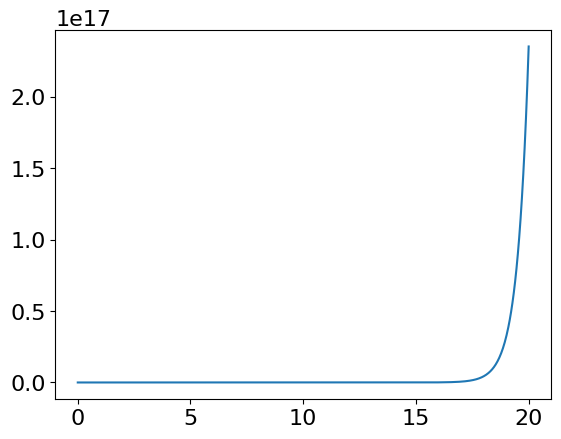

In [816]:
# Equation
def deriv (y,x) :
    return 2 * y

# Choix de l’ intervalle d’intégration
x0 = 0
xmax = 20
npoints = 1000
x = np.linspace ( x0 , xmax , npoints )

# Condition initiale
y0 = 1 # y(x0) = y0

solution = odeint ( deriv , y0 , x )
y = solution [ : , 0 ]

plt.plot ( x , y )
plt.show ( )

## Solution symbolique

## Etape 1 : Entrer l'eq diff dans Sympy

In [817]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
import sympy

x   = sympy.Symbol('x')
y   = sympy.Function('y')

left  = sympy.diff(y(x),x)

right = 2 * y(x)

edo = sympy.Eq( left , right )
display(edo)

Eq(Derivative(y(x), x), 2*y(x))

## Etape 2 : Calcul de la Solution générale

L'equation différentielle est au format y' = ay

On trouve bien la même solution que dans Yvan Monka.

Les solutions de l'equation différentielle sont les fonctions suivantes:

In [818]:
solgen = sympy.dsolve(edo,y(x)) 
display(solgen)

Eq(y(x), C1*exp(2*x))

## ---------------------- Exemple 3 ------------------

\begin{cases}
5y' + 2y =0
\end{cases}

Lien :  https://www.letudiant.fr/lycee/methodologie-lycee/article/equations-differentielles-entrainez-vous-avec-nos-exercices-corriges.html

<center><img src="img/pb.png"></center>

## Déterminer la solution générale de cette équation avec Sympy



On la mets d'abord au format "standard" avec la dérivée à gauche : 

\begin{cases}
y'= -2 * y / 5
\end{cases}

## Etape 1 : Entrer l'eq diff dans Sympy

In [819]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
import sympy

x   = sympy.Symbol('x')
y   = sympy.Function('y')

left  = sympy.diff(y(x),x)

right = -2 * y(x) / 5 # La fonction y s'écrit y(x)

edo = sympy.Eq( left , right )
display(edo)

Eq(Derivative(y(x), x), -2*y(x)/5)

## Etape 2 : Calcul de la Solution générale

L’ensemble des solutions s’écrit sous la forme yc(x) = Ce *a.x , C appartient à R
On trouve bien la même solution que dans le magazine l'étudiant.


In [820]:
solgen = sympy.dsolve(edo,y(x)) 
display(solgen)

Eq(y(x), C1*exp(-2*x/5))

## Déterminer l’unique solution de l’équation telle que y(1) = 3 avec Sympy

Autrement dit, déterminer l'unique fonction solution de l'équation différentielle, quand y(1) = 3

## Etape 1 :  Entrer la condition

La condition est une constante.

In [821]:
x0 = 0
y1 = 3
consts = sympy.solve( sympy.Eq( y1, solgen.rhs.subs(x,x0)) , dict=True)[0]
consts

{C1: 3}

## Etape 2 : Calculer La solution cherchée avec la constante

On prends en compte la constante définie précédemment.

In [822]:
solpar = solgen.subs(consts)
solpar

Eq(y(x), 3*exp(-2*x/5))

## Etape 3 : Calculer la fonction solution unique

Je remplace la constante réelle C calculée précedemment dans la solution générale de l’équation 5y’ + 2y = 0 

En cours ! J'essaye de voir si Sympy peut le calculer automatiquement...

## ---------------------- Exemple 4 ------------------
Le problème de Cauchy:
\begin{cases}
u'(x)=-3x^2u(x)+6x^2,\\
u(0)=4.
\end{cases}

On remarque que maintenant, il y a une condition initiale, c'est pour cela qu'on l'appelle " Problème de Cauchy".

## Solution Graphique (Numérique)

In [823]:
# Import des libs
from scipy import *
from scipy.integrate import odeint #Pour résoudre l’équation différentielle
import matplotlib.pyplot as plt # Permet de tracer des graphes
import numpy as np
from math import *

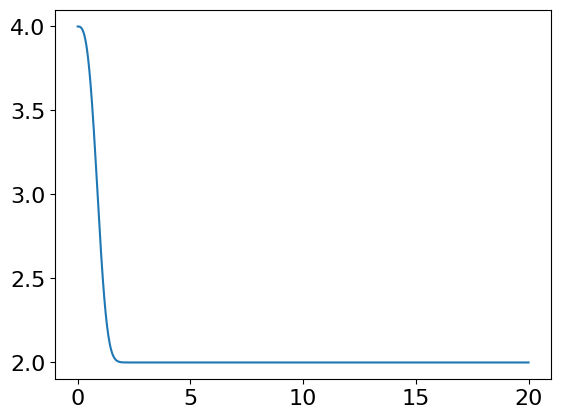

In [824]:

# Equation
def deriv (y,x) :
    return 6*x**2 - 3*x**2 * y

# Choix de l’ intervalle d’intégration
x0 = 0
xmax = 20
npoints = 1000
x = np.linspace ( x0 , xmax , npoints )

# Condition initiale
y0 = 4 # y(x0) = y0

solution = odeint ( deriv , y0 , x )
y = solution [ : , 0 ]

plt.plot ( x , y )
plt.show ( )

## Solution Symbolique

Le problème de Cauchy:
\begin{cases}
u'(x)=-3x^2u(x)+6x^2,\\
u(0)=4.
\end{cases}

## Etape 1 : Entrer l'eq diff dans Sympy

In [825]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
import sympy

x   = sympy.Symbol('x')
u   = sympy.Function('u')

left  = sympy.diff(u(x),x)

right = 6*x**2 - 3*x**2 * u(x)

edo = sympy.Eq( left , right )
display(edo)

Eq(Derivative(u(x), x), -3*x**2*u(x) + 6*x**2)

## Etape 2 : Calculer la solution générale

In [826]:
solgen = sympy.dsolve(edo,u(x)) 
display(solgen)

Eq(u(x), C1*exp(-x**3) + 2)

## Etape 3 : Prendre en compte les conditions initiale

In [827]:
x0 = 0
u0 = 4
consts = sympy.solve( sympy.Eq( u0, solgen.rhs.subs(x,x0)) , dict=True)[0]
consts

{C1: 2}

## Etape 4 : Solution avec les conditions initiales

In [828]:
solpar = solgen.subs(consts)
solpar

Eq(u(x), 2 + 2*exp(-x**3))

## Etape 5 : Solution graphique

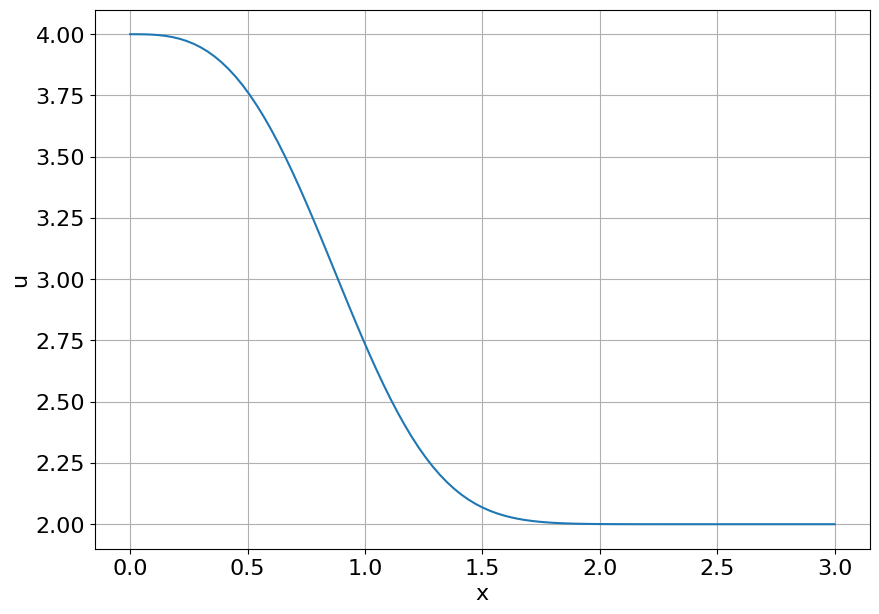

In [829]:
func = sympy.lambdify(x,solpar.rhs,'numpy')
from matplotlib.pylab import *
# rcdefaults()
rcParams.update({'font.size': 16})
figure(figsize=(10,7))
xx=linspace(0,3,101)
yy=func(xx)
plot(xx,yy)
xlabel('x')
ylabel('u')
grid()

## ---------------------- Exemple 5 ------------------

\begin{cases}
t'(x)=sin(t) * sin(x)

\end{cases}

 ## Solution Graphique

In [830]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

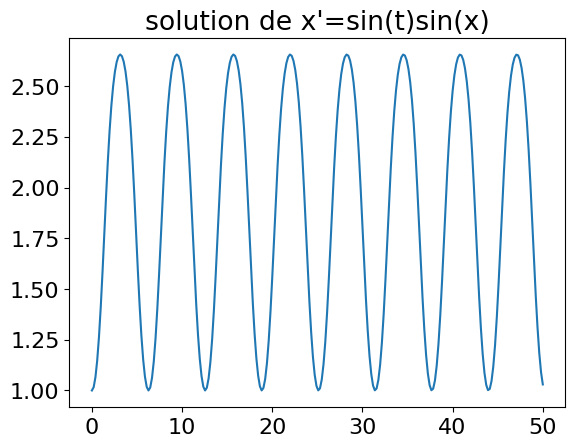

In [831]:
def f(x, t):
    return np.sin(t) * np.sin(x)
t = np.linspace(0, 50, 256)
x = odeint(f, 1, t)
plt.plot(t, x)
plt.title("solution de x'=sin(t)sin(x)")
plt.show()

## Solution symbolique

## Etape 1 : Entrer l'eq diff dans Sympy

In [832]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
import sympy

x   = sympy.Symbol('x')
y   = sympy.Function('y')

left  = sympy.diff(y(x),x) # Partie gauche, avec la dérivée

right = sympy.sin(y(x)) * sympy.sin(x) # Partie droite, avec les sin et cos qui fonctionnent.

edo = sympy.Eq( left , right )
display(edo)

Eq(Derivative(y(x), x), sin(x)*sin(y(x)))